In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv('Credit_Card_Applications.csv')
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [19]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
X = sc.fit_transform(X)

In [20]:
from minisom import MiniSom

In [21]:
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)

In [22]:
# Randomly initialize the weights
som.random_weights_init(X)

In [23]:
# Train the som
som.train_random(data = X, num_iteration = 100)

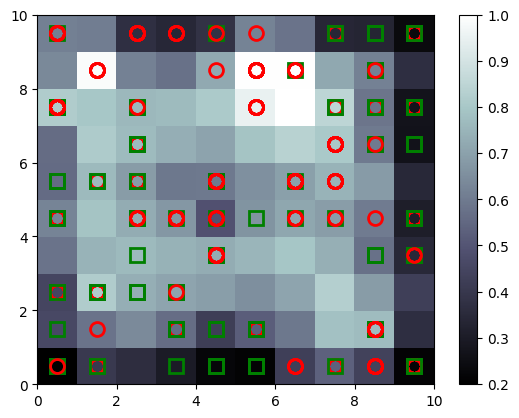

In [25]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] +0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [28]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(1, 8)], mappings[(6, 8)]), axis = 0)
frauds = sc.inverse_transform(frauds)

In [29]:
print(frauds)

[[1.5745375e+07 0.0000000e+00 3.3080000e+01 1.6250000e+00 2.0000000e+00
  2.0000000e+00 4.0000000e+00 5.4000000e-01 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 2.0000000e+00 0.0000000e+00 1.0000000e+00]
 [1.5638983e+07 0.0000000e+00 5.6830000e+01 4.2500000e+00 1.0000000e+00
  1.0000000e+00 1.0000000e+00 5.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 2.0000000e+00 0.0000000e+00 5.0000000e+00]
 [1.5654625e+07 0.0000000e+00 5.3330000e+01 1.6500000e-01 2.0000000e+00
  1.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 1.0000000e+00 6.2000000e+01 2.8000000e+01]
 [1.5795527e+07 0.0000000e+00 4.2250000e+01 1.7500000e+00 1.0000000e+00
  8.0000000e+00 4.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 2.0000000e+00 1.5000000e+02 2.0000000e+00]
 [1.5641733e+07 0.0000000e+00 5.0250000e+01 8.3500000e-01 2.0000000e+00
  6.0000000e+00 4.0000000e+00 5.0000000e-01 0.0000000e+00 0.